In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from model import *
%cd '/home/jupyter/Saved_results'

checkpoint_dir = '12_14_17_54'

#generator = make_generator_model_mnist()
generator = make_generator_model_svhn()

checkpoint = tf.train.Checkpoint(generator=generator)
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
print(tf.train.latest_checkpoint(checkpoint_dir))

## or restore certain checkpoint
# checkpoint.restore('saveimage/12_13_20_40/ckpt-3')

/home/jupyter/Saved_results
12_14_17_54/ckpt-10


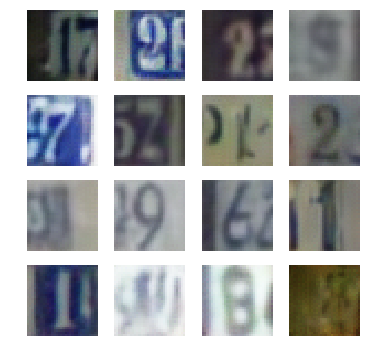

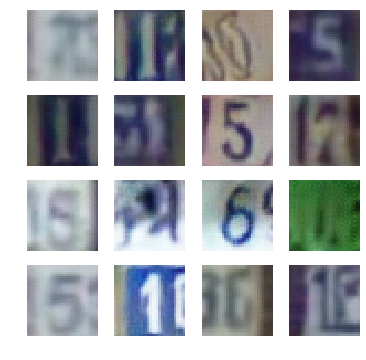

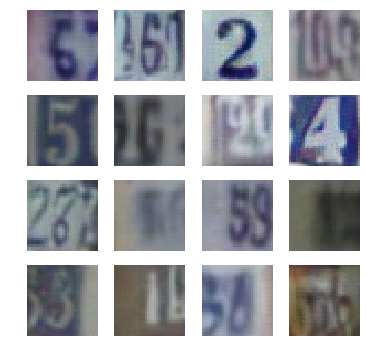

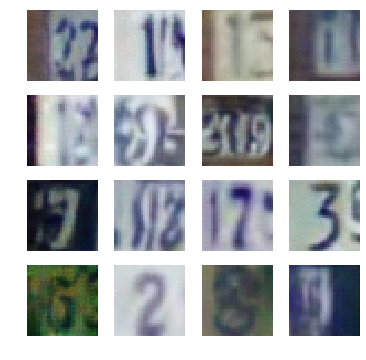

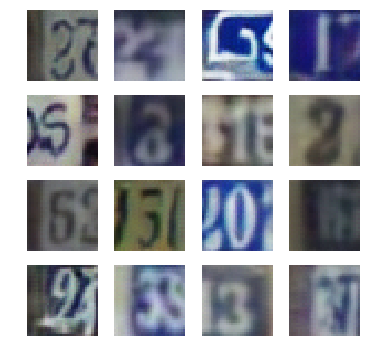

In [3]:
DATA = 'SVHN'

for j in range(5):
    noise = tf.random.normal([16, 100])
    predictions = generator(noise, training=False)
    fig = plt.figure(figsize=(6, 6))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        if DATA.lower() == 'mnist':
            plt.imshow(np.uint8(predictions[i, :, :, 0] * 127.5 + 127.5), cmap='gray')
        elif DATA.lower() == 'svhn':
            plt.imshow(np.uint8(predictions[i, :, :, :] * 127.5 + 127.5))
        plt.axis('off')
    plt.savefig('./image{}.png'.format(j))